In [2]:
!pip install -qq google-play-scraper

ERROR: Could not find a version that satisfies the requirement google-play-scrapper (from versions: none)
ERROR: No matching distribution found for google-play-scrapper


In [3]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer

In [4]:
from pygments.formatters import TerminalFormatter


In [5]:
from google_play_scraper import Sort, reviews, app

In [6]:
%matplotlib inline

In [7]:
%config InlineBackend.figure_format ='retina'

In [8]:
sns.set(style='whitegrid', palette ='muted', font_scale=1.2)

In [33]:
result1=app('ng.gov.cbn.speed.wallet.temp', lang='en')

In [35]:
print(result1)

{'title': 'eNaira Speed Wallet (Individual)', 'description': 'eNaira Speed Wallet is a fast and convenient way to conduct financial transactions.\r\nDownload and sign up to get started.\r\n\r\n\r\neNaira is safe!\r\nYour money is guaranteed and secured with the Central Bank of Nigeria\r\n\r\neNaira is smart and easy!\r\nRemote, online, or in-person transactions, paying and getting paid are as simple as a scan or a click', 'descriptionHTML': 'eNaira Speed Wallet is a fast and convenient way to conduct financial transactions.<br>Download and sign up to get started.<br><br><br>eNaira is safe!<br>Your money is guaranteed and secured with the Central Bank of Nigeria<br><br>eNaira is smart and easy!<br>Remote, online, or in-person transactions, paying and getting paid are as simple as a scan or a click', 'summary': 'The eNaira is a digital representation of the naira (Our National Currency).', 'summaryHTML': 'The eNaira is a digital representation of the naira (Our National Currency).', 'ins

In [19]:
def print_json(json_object):
    json_str = json.dumps(json.object, indent =2, sort_keys=True, default=str)
print(highlight(json_str, JsonLexer(), TerminalFormatter()))
    

NameError: name 'json_str' is not defined

In [26]:
result,continuation_token =reviews('ng.gov.cbn.speed.wallet.temp', lang ='en', filter_score_with=5)

In [27]:
print(result)

[{'reviewId': 'gp:AOqpTOH-rzIEwfzlVSzFdMnI4zN9KlG7DlWEvQupsP5fBNBSpd0-woOYz0N4ij_nhHudkFNeg7Z0G1rcbM7GFCo', 'userName': 'Luka yohanna', 'userImage': 'https://play-lh.googleusercontent.com/a-/AOh14GhUGoaQ7vS9ZJatSmL3pUJHzzHjGFHUf5Yoa2K_', 'content': 'Good', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '1.0.1', 'at': datetime.datetime(2022, 2, 3, 17, 9, 45), 'replyContent': None, 'repliedAt': None}, {'reviewId': 'gp:AOqpTOEZs9h_e3uSyiOJtO_BohLjBrZtX7TjTby1NVdOeIoU20IxnndnTFaiV7oLE_9jrC7bIGhQFd2TxtikUNw', 'userName': 'Idris Tijjani', 'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJyHzGzjiE9AMxBst62nl5QnYGoJYrCqTn_Hu8fD=mo', 'content': 'Great, made transactions easier and transparent. Call on public to get it and use it. They will surely have an awesome experience.', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '1.0.1', 'at': datetime.datetime(2022, 2, 2, 12, 5, 47), 'replyContent': None, 'repliedAt': None}, {'reviewId': 'gp:AOqpTOEXriOomHjzzFgdboW6_qeHQZ1

In [28]:
result,_ = reviews('ng.gov.cbn.speed.wallet.temp', continuation_token=continuation_token)

In [29]:
print(result)

[{'reviewId': 'gp:AOqpTOFhpJJKqotkN-1QfavjsblVGQ8aRMORA3vc21o0TTRVK5hYIAx4L5SL_FDKHPTYYyciefNDxkGcgjJqTOI', 'userName': 'faruk jibril', 'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJxBlQx75HZdTMXou5LPfewhQnozDJq7LsDK5zAZ=mo', 'content': 'Real spead', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': None, 'at': datetime.datetime(2021, 12, 2, 13, 30, 8), 'replyContent': 'Thank You', 'repliedAt': datetime.datetime(2021, 12, 2, 21, 8, 29)}, {'reviewId': 'gp:AOqpTOHiBZsuQWRJgEi0_I9LMyZ9hC0y8NRTCs0JegmJWZVdVTJYuaGPLEJdwSujT82e0PDZCagaUIjNT5OV3-k', 'userName': 'Florence Alabi', 'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJw2iDa-eVerusOXXks94xkNS99kRJE6JSR-kQzP=mo', 'content': 'Excellent', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '1.0.1', 'at': datetime.datetime(2021, 12, 2, 13, 29, 7), 'replyContent': 'It is delightful to hear such positive words.', 'repliedAt': datetime.datetime(2021, 12, 2, 21, 8, 49)}, {'reviewId': 'gp:AOqpTOEp8QyfCIO2Ch3f

In [30]:
from google_play_scraper import reviews_all

In [69]:
result2= reviews_all('ng.gov.cbn.speed.wallet.temp', sleep_milliseconds=0, lang='en')

In [72]:

ap_review=pd.DataFrame(result2)
ap_review.shape

(4841, 10)

In [74]:
ap_review.to_csv('reviews2.csv', index=None, header=True)

In [37]:
app_packages=['ng.gov.cbn.speed.merchant.temp','ng.gov.cbn.speed.wallet.temp']

In [38]:
app_infos = []
for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 2/2 [00:03<00:00,  1.87s/it]


In [39]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [40]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "5.0",
  "androidVersionText": "5.0 and up",
  "appId": "ng.gov.cbn.speed.merchant.temp",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Speed eNaira Merchant is a fast and convenient way to conduct financial transactions for your business.\r\nDownload and sign up to get started.\r\n\r\neNaira is safe!\r\nYour money is guaranteed and secured with the Central Bank of Nigeria\r\n\r\neNaira is smart and easy!\r\nWhether your business is remote, online, or in-person, getting paid is as simple as a scan or a click!",
  "descriptionHTML": "Speed eNaira Merchant is a fast and convenient way to conduct financial transactions for your business.<br>Download and sign up to get started.<br><br>eNaira is safe!<br>Your money is guaranteed and secured with the Central Bank of Nigeria<br><br>eNaira is smart and easy!<br>Whether your business is remote, online, or in-person, g

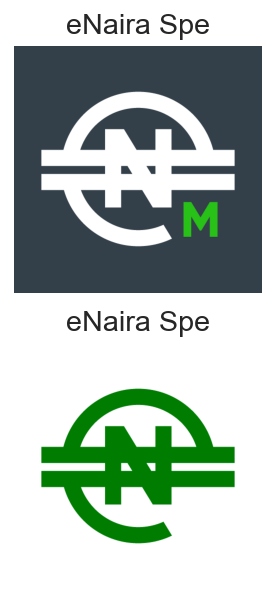

In [41]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]
fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))
for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [42]:
app_infos_df = pd.DataFrame(app_infos)


In [43]:
app_infos_df

title  \
0  eNaira Speed Merchant Wallet (Business)   
1         eNaira Speed Wallet (Individual)   

                                         description  \
0  Speed eNaira Merchant is a fast and convenient...   
1  eNaira Speed Wallet is a fast and convenient w...   

                                     descriptionHTML  \
0  Speed eNaira Merchant is a fast and convenient...   
1  eNaira Speed Wallet is a fast and convenient w...   

                                             summary  \
0  This is the eNaira Speed Wallet for Merchant t...   
1  The eNaira is a digital representation of the ...   

                                         summaryHTML  installs  minInstalls  \
0  This is the eNaira Speed Wallet for Merchant t...   50,000+        50000   
1  The eNaira is a digital representation of the ...  100,000+       100000   

      score  ratings  reviews  ...      released     updated  version  \
0  2.633333      443       21  ...  Oct 22, 2021  1634938327    1.0.0   
1  2.769231     5924      211  ...  Oct 22, 2021  1635972105    1.0.1   

                                       recentChanges  \
0  Speed eNaira Merchant is a fast and convenient...   
1  Friendly onboarding experience. You now have t...   

                                   recentChangesHTML editorsChoice  \
0  Speed eNaira Merchant is a fast and convenient...         False   
1  Friendly onboarding experience. You now have t...         False   

                                         similarApps  \
0  [ng.bytelabs.watu, moneymie.bank.nigeria.remit...   
1  [ng.bytelabs.watu, com.chippercash, com.ubanqu...   

                    moreByDeveloper                           appId  \
0    [ng.gov.cbn.speed.wallet.temp]  ng.gov.cbn.speed.merchant.temp   
1  [ng.gov.cbn.speed.merchant.temp]    ng.gov.cbn.speed.wallet.temp   

                                                 url  
0  https://play.google.com/store/apps/details?id=...  
1  https://play.google.com/store/apps/details?id=...  

[2 rows x 51 columns]

In [56]:
app_infos_df.to_csv('app_infos.csv', index=None, header=True)

In [59]:
# Getting review score
for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 2/2 [00:16<00:00,  8.02s/it]


In [61]:
print_json(app_reviews[1])

{
  "appId": "ng.gov.cbn.speed.merchant.temp",
  "at": "2021-10-28 07:38:39",
  "content": "Disaster waiting to happen.. I knew the app had no potential but I needed to see the extent to which it was utterly pointless. I'm an app developer and honestly even a 14 year old beginner is not this terrible, can't believe this app was designed by a full team of software developers.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "1.0.0",
  "reviewId": "gp:AOqpTOFsxW1PUZN0n8gNTzVTatv2y8QmTks_V1pviLdOxbSR4CEereh079ddNZzFV-DBj9_eaT1DgMFHZlDYOg",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 76,
  "userImage": "https://play-lh.googleusercontent.com/a-/AOh14GhUl8D2NisaURbzsTnKrqwG5-xFGy5TtnDAyk30SA",
  "userName": "DANIEL CHUKWUKERE"
}



In [62]:
len(app_reviews)

2903

In [63]:
# loading the json file into a dataframe
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

(2903, 12)

In [64]:
app_reviews_df

reviewId           userName  \
0     gp:AOqpTOGMyM6UFwCmkuOVGlLqXvFbe5eShfdCqFXCOe1...        M.A Ibrahim   
1     gp:AOqpTOFsxW1PUZN0n8gNTzVTatv2y8QmTks_V1pviLd...  DANIEL CHUKWUKERE   
2     gp:AOqpTOEPBd_fDfB6yvYONmmFI-getybIwCm1o7BePoE...        Lawal Aremu   
3     gp:AOqpTOGn0sLMYg2kvKt4sCjWOUBtjhI4OodBnpcS5EP...       David Godwin   
4     gp:AOqpTOGCRVHZJUw2uOWrN_sIfb3vtP0qZJBDDh0CY_H...     Kolawole Isaac   
...                                                 ...                ...   
2898  gp:AOqpTOHQ9Ca7lPoMS1NQrPTzlH0hmKUPQ4GfgDRK8JD...     Zakariyau Bako   
2899  gp:AOqpTOEt_ur0p8OhDLRECKTLktM6NXPmoh197VYeKb5...        Moses Ojero   
2900  gp:AOqpTOHLJ4T4s1nHI73X5Anh5MaDZg2O_GYYOhE9yNP...   Ezekiel Adewunmi   
2901  gp:AOqpTOHEldkFr_OMHUVONHmZdawk9sEo6VhRFZhK3Rv...    Toheer Horlanre   
2902  gp:AOqpTOGsZ3V5QHChxXNAbDdWik0G_Qrq9yXyxXacCvu...       Haliru ahmed   

                                              userImage  \
0     https://play-lh.googleusercontent.com/a-/AOh14...   
1     https://play-lh.googleusercontent.com/a-/AOh14...   
2     https://play-lh.googleusercontent.com/a-/AOh14...   
3     https://play-lh.googleusercontent.com/a/AATXAJ...   
4     https://play-lh.googleusercontent.com/a-/AOh14...   
...                                                 ...   
2898  https://play-lh.googleusercontent.com/a-/AOh14...   
2899  https://play-lh.googleusercontent.com/a-/AOh14...   
2900  https://play-lh.googleusercontent.com/a-/AOh14...   
2901  https://play-lh.googleusercontent.com/a/AATXAJ...   
2902  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                                content  score  thumbsUpCount  \
0     Nice interface, very annoying registration pro...      1              3   
1     Disaster waiting to happen.. I knew the app ha...      1             76   
2     Even after following the advice of the CBN age...      1              3   
3     It's been more than 20days I downloaded this a...      1              3   
4     This is like re-inventing the wheel. The purpo...      1             35   
...                                                 ...    ...            ...   
2898                                       Masha Allaah      5              0   
2899                                             Lovely      5              0   
2900  You created the best idea I was working on 10 ...      5              0   
2901                                          Fantastic      5              0   
2902                                          Thank you      5              0   

     reviewCreatedVersion                  at  \
0                   1.0.0 2022-01-22 06:36:56   
1                   1.0.0 2021-10-28 07:38:39   
2                   1.0.0 2021-11-24 13:40:55   
3                   1.0.0 2021-11-16 02:53:49   
4                   1.0.0 2021-10-27 22:22:40   
...                   ...                 ...   
2898                1.0.1 2021-12-03 10:18:15   
2899                1.0.1 2021-12-02 21:25:19   
2900                1.0.1 2021-12-02 20:13:20   
2901                 None 2021-12-02 18:11:00   
2902                1.0.1 2021-12-02 16:13:36   

                                           replyContent           repliedAt  \
0                                                  None                 NaT   
1                                                  None                 NaT   
2     Hello,\nPlease write to us via mail at helpdes... 2021-11-18 15:19:56   
3     Hi,\nPlease write to us via mail at helpdesk@e... 2021-11-18 15:20:08   
4                                                  None                 NaT   
...                                                 ...                 ...   
2898                                          Thank You 2021-12-05 19:07:29   
2899                                             Thanks 2021-12-02 21:21:49   
2900                                    Thanks Adewunmi 2021-12-02 21:05:51   
2901  It is delightful to hear such positive word

In [65]:
app_reviews_df.to_csv('reviews.csv',index=None, header=True)

In [75]:
# install new libraries
!pip install transformers

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

huggingface-hub 0.4.0 requires packaging>=20.9, but you'll have packaging 20.4 which is incompatible.


In [ ]:
import transformer